In [123]:
import tensorflow as tf
import pandas as pd

from FeedBack import FeedBack
from window import WindowGenerator
from utils import train_test_val_split

# Autoregressive (AR) LSTM

## Dataset

In [124]:
case_1 = pd.read_csv("../datasets/case_1.csv")
case_2 = pd.read_csv("../datasets/case_2.csv")
case_3 = pd.read_csv("../datasets/case_3.csv")
case_4 = pd.read_csv("../datasets/case_4.csv")
case_5 = pd.read_csv("../datasets/case_5.csv")

In [125]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets
feature_count = len(case_1.columns)

In [126]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Train case function

In [127]:
def train_case(case_df:pd.DataFrame, model:FeedBack, in_width:int, out_steps:int, max_epochs:int):
    """ Train model for given case df. """

    outlets = [ col for col in case_df.columns.values if col.startswith('outlet') ]
    column_indices = { name: i for i, name in enumerate(case_df.columns) }

    train_df, test_df, val_df = train_test_val_split(case_df)
    # train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

    label_columns = outlets

    multi_window = WindowGenerator(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        input_width=in_width,
        label_width=out_steps,
        shift=out_steps,
        # label_columns=label_columns
    )

    history = model.fit(
        multi_window.train,
        epochs=max_epochs,
        validation_data=multi_window.val,
        verbose=0
        # callbacks=[early_stopping]
    )

    return multi_window, history

## Model creation

In [128]:
IN_WIDTH = 8
OUT_STEPS = 8
MAX_EPOCHS = 100
features_size = len(label_columns)

In [129]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS, num_features=feature_count)

In [130]:
feedback_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

## Case 1

In [131]:
window, history = train_case(
    case_df=case_1,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

2022-08-30 18:51:56.977179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-30 18:51:59.223444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [132]:
feedback_model.build(input_shape=window.example[0].shape)
feedback_model.summary()

Model: "feed_back_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_cell_4 (LSTMCell)      multiple                  39040     
                                                                 
 rnn_4 (RNN)                 multiple                  39040     
                                                                 
 dense_4 (Dense)             multiple                  8976      
                                                                 
Total params: 48,016
Trainable params: 48,016
Non-trainable params: 0
_________________________________________________________________


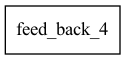

In [133]:
tf.keras.utils.plot_model(feedback_model, "../plots/models/feedback_model.png", show_shapes=True)

2022-08-30 18:52:49.834801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


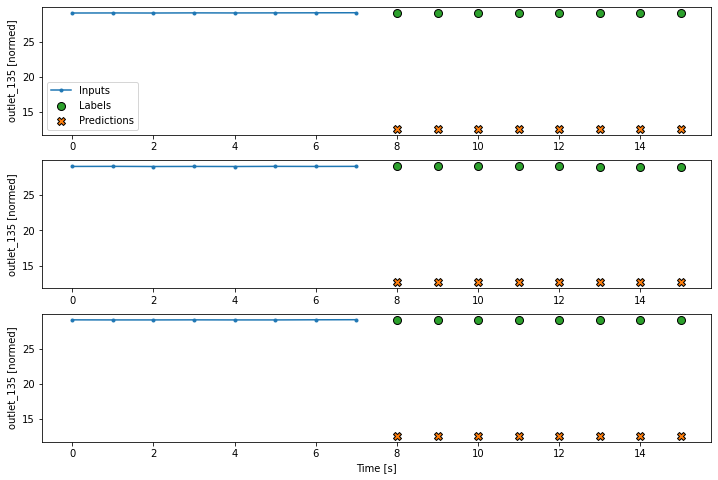

In [134]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

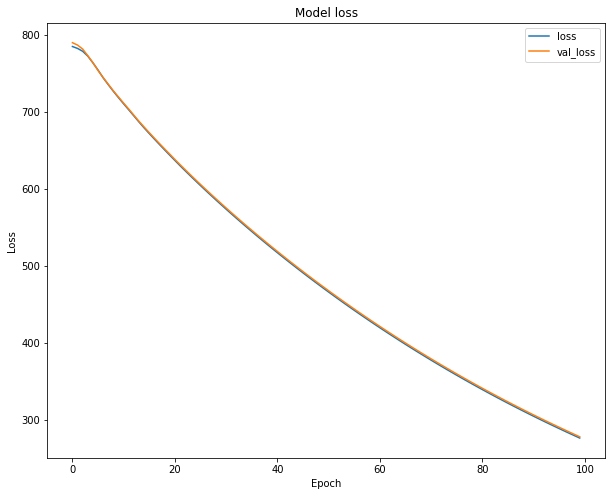

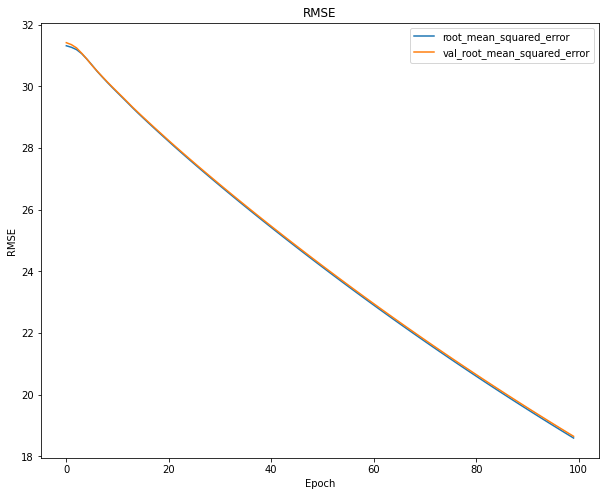

In [135]:
losses = pd.DataFrame(history.history)

losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [136]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 210ms/step - loss: 278.0183 - root_mean_squared_error: 18.6393


[278.0183410644531, 18.63932228088379]

## Case 2

In [137]:
window, history = train_case(
    case_df=case_2,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

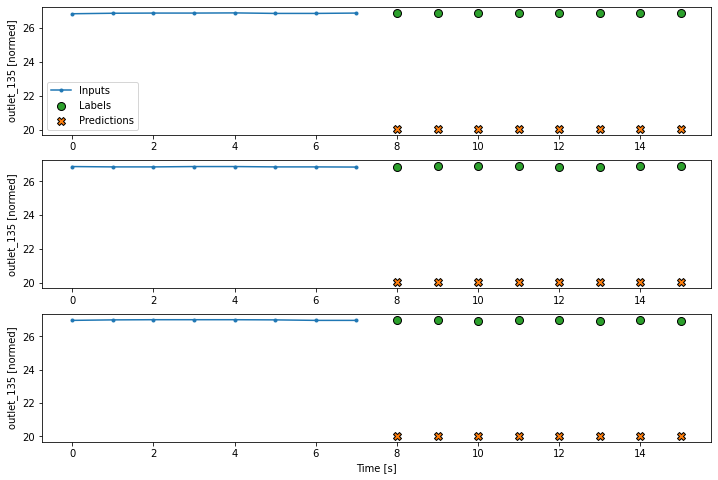

In [138]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

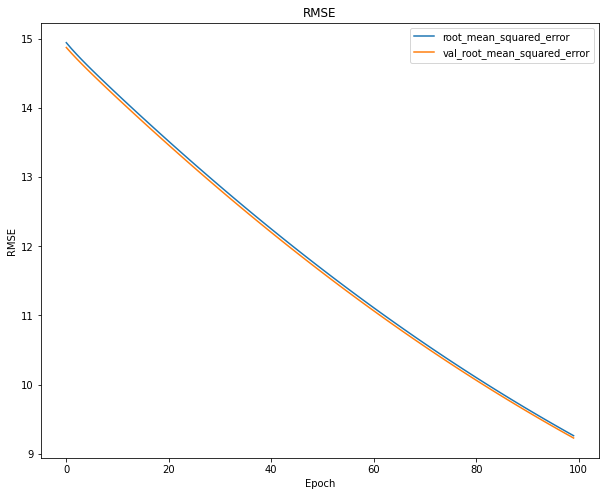

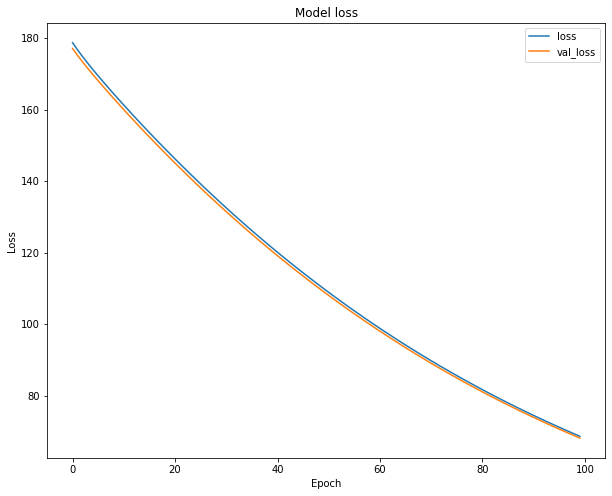

In [139]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [140]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 242ms/step - loss: 68.8371 - root_mean_squared_error: 9.2769


[68.83709716796875, 9.276877403259277]

## Case 3

In [141]:
window, history = train_case(
    case_df=case_3,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

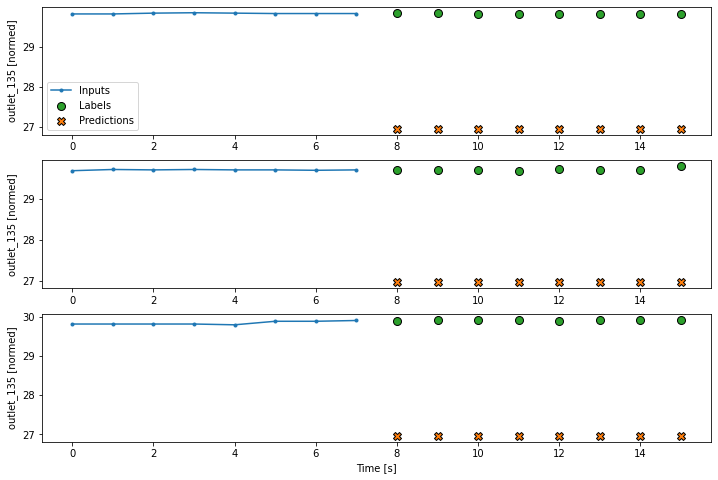

In [142]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

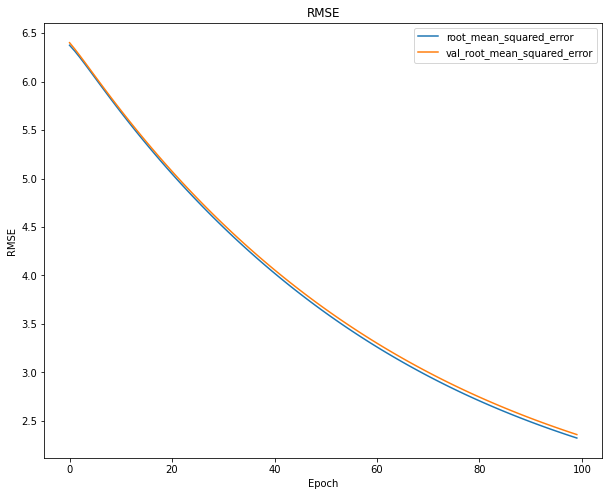

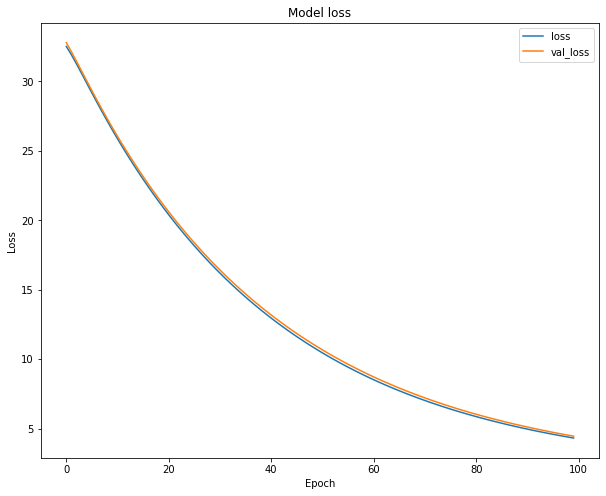

In [143]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [144]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 200ms/step - loss: 4.3425 - root_mean_squared_error: 2.3273


[4.342532634735107, 2.327331781387329]

## Case 4

In [145]:
window, history = train_case(
    case_df=case_4,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

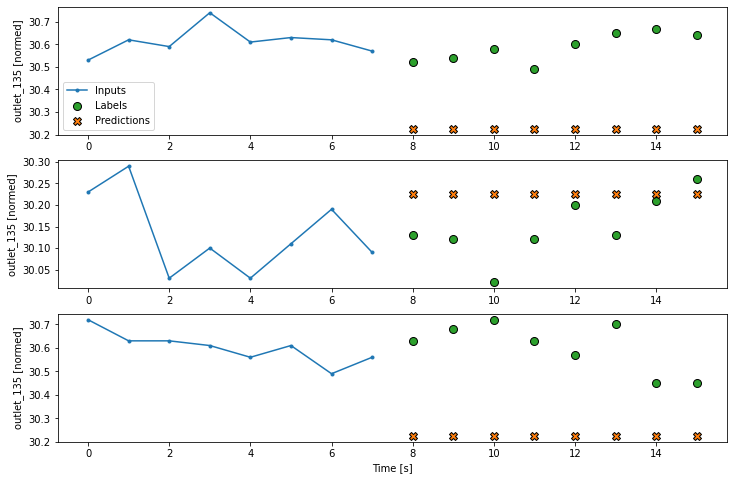

In [146]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

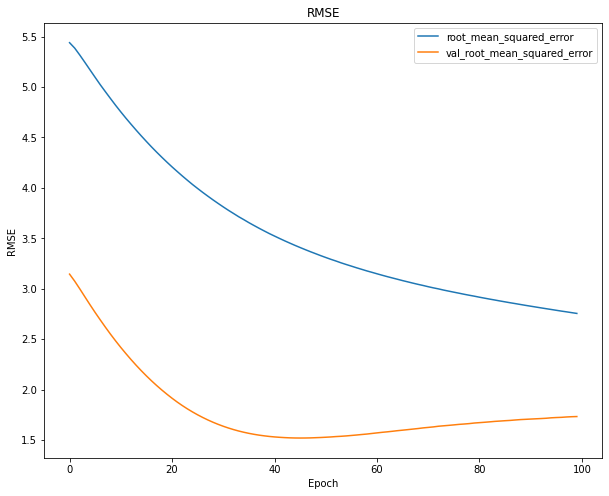

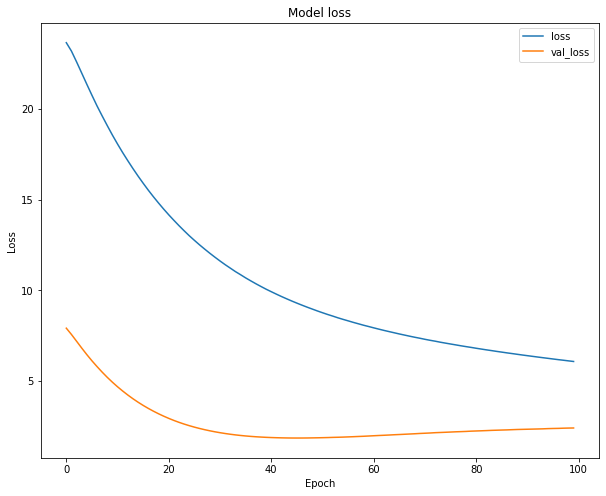

In [147]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [148]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 223ms/step - loss: 2.3856 - root_mean_squared_error: 1.7254


[2.3855841159820557, 1.7254376411437988]

## Case 5

In [149]:
window, history = train_case(
    case_df=case_5,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

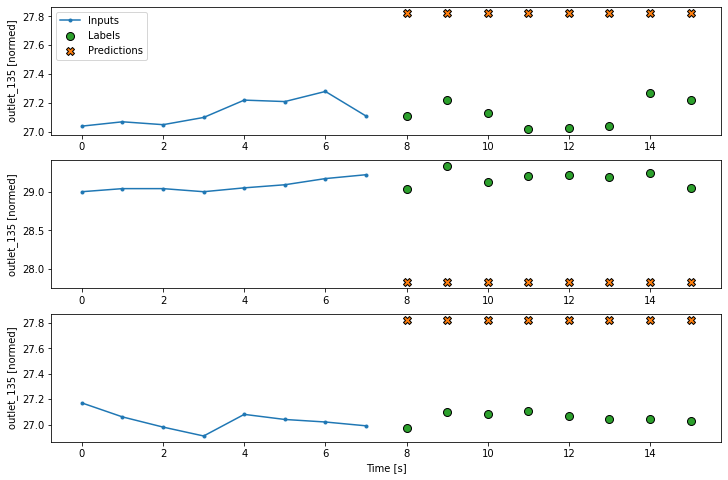

In [150]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

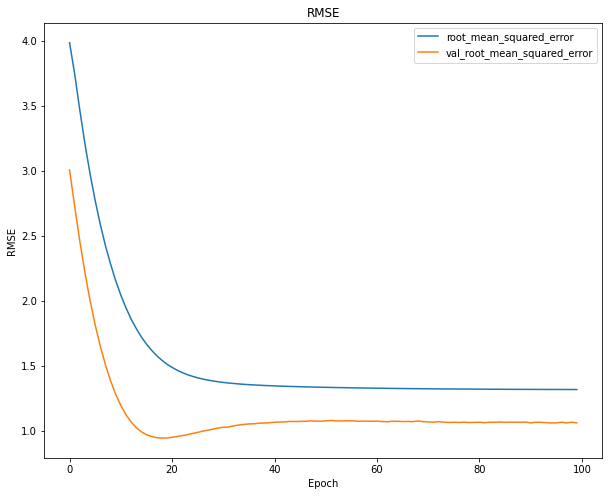

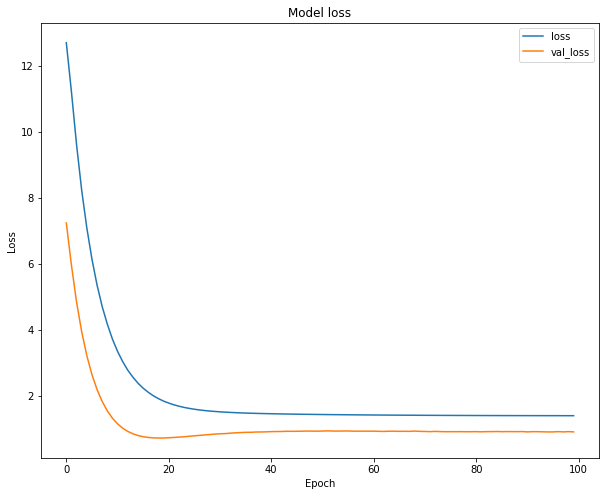

In [151]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [152]:
feedback_model.evaluate(window.test)

2/2 [==============================] - 0s 21ms/step - loss: 1.9687 - root_mean_squared_error: 1.5696


[1.968696117401123, 1.5695765018463135]